In [1]:
run /home/alec/galvanize/capstone/Forecasting_Walmart_Sales/src/script.py

In [2]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [3]:
def get_actuals(series_lst, periods_back):
    actuals = []
    for i in series_lst:
        if periods_back == 1:
            actuals.append(i[-1:].iloc[0,0])
        else:
            actuals.append(i[-periods_back:-1].iloc[0,0])
    return actuals

In [4]:
def calculate_errors(actual, forecast):
    return abs((actual-forecast)/actual)

In [5]:
def arima_forecast(store_ids, dept_ids, art_dict, holdout_periods, interval):
    lst_of_forecasts = []
    for _ in range(holdout_periods):
        lst_of_forecasts.append([]) 
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
    count = 0
    for idx,i in enumerate(series_lst):
        print(count)
        count += 1
        if idx == 68 or idx == 69:
            train, test = train_test_split(i, train_size=len(i)-holdout_periods)
            model = pm.auto_arima(train, seasonal=True)
            forecasts = model.predict(test.shape[0]).tolist()
            for idx, val in enumerate(forecasts):
                lst_of_forecasts[idx].append(val)
        elif len(i) <= 24:
            train, test = train_test_split(i, train_size=len(i)-holdout_periods)
            model = pm.auto_arima(train, seasonal=True)
            forecasts = model.predict(test.shape[0]).tolist()
            for idx, val in enumerate(forecasts):
                lst_of_forecasts[idx].append(val)
        else:
            train, test = train_test_split(i, train_size=len(i)-holdout_periods)
            model = pm.auto_arima(train, seasonal=True, m=12)
            forecasts = model.predict(test.shape[0]).tolist()
            for idx, val in enumerate(forecasts):
                lst_of_forecasts[idx].append(val)
    return lst_of_forecasts, series_lst

In [6]:
art_dict = {}
#art_dict[1] = resample_series(make_series('CA_1', 'HOBBIES_2'),'M')[44:]
art_dict[4] = resample_series(make_series('CA_1', 'FOODS_1'),'M')[22:]
#art_dict[8] = resample_series(make_series('CA_2', 'HOBBIES_2'),'M')[38:]
art_dict[12] = resample_series(make_series('CA_2', 'FOODS_2'),'M')[-13:] #added one bc I was getting an error, used to be [-6:]
#art_dict[13] = resample_series(make_series('CA_2', 'FOODS_3'),'M')[53:]
art_dict[15] = resample_series(make_series('CA_3', 'HOBBIES_2'),'M')[38:]
#art_dict[22] = resample_series(make_series('CA_4', 'HOBBIES_2'),'M')[38:]
art_dict[25] = resample_series(make_series('CA_4', 'FOODS_1'),'M')[16:]
#art_dict[29] = resample_series(make_series('TX_1', 'HOBBIES_2'),'M')[38:]
art_dict[30] = resample_series(make_series('TX_1', 'HOUSEHOLD_1'),'M')[16:]
art_dict[32] = resample_series(make_series('TX_1', 'FOODS_1'),'M')[14:]
art_dict[39] = resample_series(make_series('TX_2', 'FOODS_1'),'M')[46:]
#art_dict[40] = resample_series(make_series('TX_2', 'FOODS_2'),'M')[26:]
#art_dict[43] = resample_series(make_series('TX_3', 'HOBBIES_2'),'M')[46:]
#art_dict[44] = resample_series(make_series('TX_3', 'HOUSEHOLD_1'),'M')[26:]
#art_dict[46] = resample_series(make_series('TX_3', 'FOODS_1'),'M')[26:]
art_dict[50] = resample_series(make_series('WI_1', 'HOBBIES_2'),'M')[41:]
#art_dict[57] = resample_series(make_series('WI_2', 'HOBBIES_2'),'M')[26:]
art_dict[60] = resample_series(make_series('WI_2', 'FOODS_1'),'M')[16:]
#art_dict[66] = resample_series(make_series('WI_3', 'HOUSEHOLD_2'),'M')[40:]
art_dict[68] = resample_series(make_series('WI_3', 'FOODS_2'),'M')[34:]
art_dict[69] = resample_series(make_series('WI_3', 'FOODS_3'),'M')[26:]

In [7]:
#arima_forecasts6, series_lst6 = arima_forecast(store_id, dept_id, art_dict, 6, 'M')

In [8]:
#SAVE THE LISTS AS NUMPY ARRAYS SO WE DON"T HAVE TO RUN AGAIN
#x = np.array(arima_forecasts6)
#np.save('arima_forecasts6_2', x)

In [9]:
x = np.load('arima_forecasts6_2.npy')
arima_forecasts6 = x.tolist()

In [10]:
#Can't save series_lst6 to a numpy array. Maybe write a separate function to get that if needed?
def make_series_list6(store_ids, dept_ids, art_dict, interval):
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
    return series_lst

series_lst6 = make_series_list6(store_id, dept_id, art_dict, 'M')

In [11]:
def get_6_month_errors(arima_forecasts6):
    arima6_oct = arima_forecasts6[0]
    arima6_nov = arima_forecasts6[1]
    arima6_dec = arima_forecasts6[2]
    arima6_jan = arima_forecasts6[3]
    arima6_feb = arima_forecasts6[4]
    arima6_mar = arima_forecasts6[5]

    oct_actuals = get_actuals(series_lst6, 6)
    nov_actuals = get_actuals(series_lst6, 5)
    dec_actuals = get_actuals(series_lst6, 4)
    jan_actuals = get_actuals(series_lst6, 3)
    feb_actuals = get_actuals(series_lst6, 2)
    mar_actuals = get_actuals(series_lst6, 1)

    arima6_oct_error = []
    for idx, val in enumerate(oct_actuals):
        arima6_oct_error.append(round(calculate_errors(val, arima6_oct[idx]), 2))

    arima6_nov_error = []
    for idx, val in enumerate(nov_actuals):
        arima6_nov_error.append(round(calculate_errors(val, arima6_nov[idx]), 2))

    arima6_dec_error = []
    for idx, val in enumerate(dec_actuals):
        arima6_dec_error.append(round(calculate_errors(val, arima6_dec[idx]), 2))

    arima6_jan_error = []
    for idx, val in enumerate(jan_actuals):
        arima6_jan_error.append(round(calculate_errors(val, arima6_jan[idx]), 2))

    arima6_feb_error = []
    for idx, val in enumerate(feb_actuals):
        arima6_feb_error.append(round(calculate_errors(val, arima6_feb[idx]), 2))

    arima6_mar_error = []
    for idx, val in enumerate(mar_actuals):
        arima6_mar_error.append(round(calculate_errors(val, arima6_mar[idx]), 2))

    arima6_oct_error = np.array(arima6_oct_error)
    arima6_nov_error = np.array(arima6_nov_error)
    arima6_dec_error = np.array(arima6_dec_error)
    arima6_jan_error = np.array(arima6_jan_error)
    arima6_feb_error = np.array(arima6_feb_error)
    arima6_mar_error = np.array(arima6_mar_error)
    return arima6_oct_error, arima6_nov_error, arima6_dec_error, arima6_jan_error, arima6_feb_error, arima6_mar_error

In [12]:
arima6_oct_error, arima6_nov_error, arima6_dec_error, arima6_jan_error, arima6_feb_error, arima6_mar_error = get_6_month_errors(arima_forecasts6)

In [13]:
count = 0
for idx, val in enumerate(series_setup(store_id, dept_id)):
    print(f'{count}: {val} Oct error: {round(arima6_oct_error[idx], 2)}, Nov error: {round(arima6_nov_error[idx], 2)}, Dec error: {round(arima6_dec_error[idx], 2)}, Jan error: {round(arima6_jan_error[idx], 2)}, Feb error: {round(arima6_feb_error[idx], 2)}, Mar error: {round(arima6_mar_error[idx], 2)}')
    count += 1

0: ['CA_1', 'HOBBIES_1'] Oct error: 0.01, Nov error: 0.02, Dec error: 0.04, Jan error: 0.02, Feb error: 0.11, Mar error: 0.09
1: ['CA_1', 'HOBBIES_2'] Oct error: 0.24, Nov error: 0.15, Dec error: 0.0, Jan error: 0.14, Feb error: 0.07, Mar error: 0.0
2: ['CA_1', 'HOUSEHOLD_1'] Oct error: 0.02, Nov error: 0.07, Dec error: 0.09, Jan error: 0.03, Feb error: 0.12, Mar error: 0.11
3: ['CA_1', 'HOUSEHOLD_2'] Oct error: 0.05, Nov error: 0.06, Dec error: 0.04, Jan error: 0.04, Feb error: 0.06, Mar error: 0.12
4: ['CA_1', 'FOODS_1'] Oct error: 0.06, Nov error: 0.34, Dec error: 0.06, Jan error: 0.12, Feb error: 0.12, Mar error: 0.01
5: ['CA_1', 'FOODS_2'] Oct error: 0.12, Nov error: 0.05, Dec error: 0.04, Jan error: 0.14, Feb error: 0.04, Mar error: 0.14
6: ['CA_1', 'FOODS_3'] Oct error: 0.05, Nov error: 0.13, Dec error: 0.21, Jan error: 0.06, Feb error: 0.07, Mar error: 0.02
7: ['CA_2', 'HOBBIES_1'] Oct error: 0.02, Nov error: 0.02, Dec error: 0.14, Jan error: 0.08, Feb error: 0.02, Mar error: 0

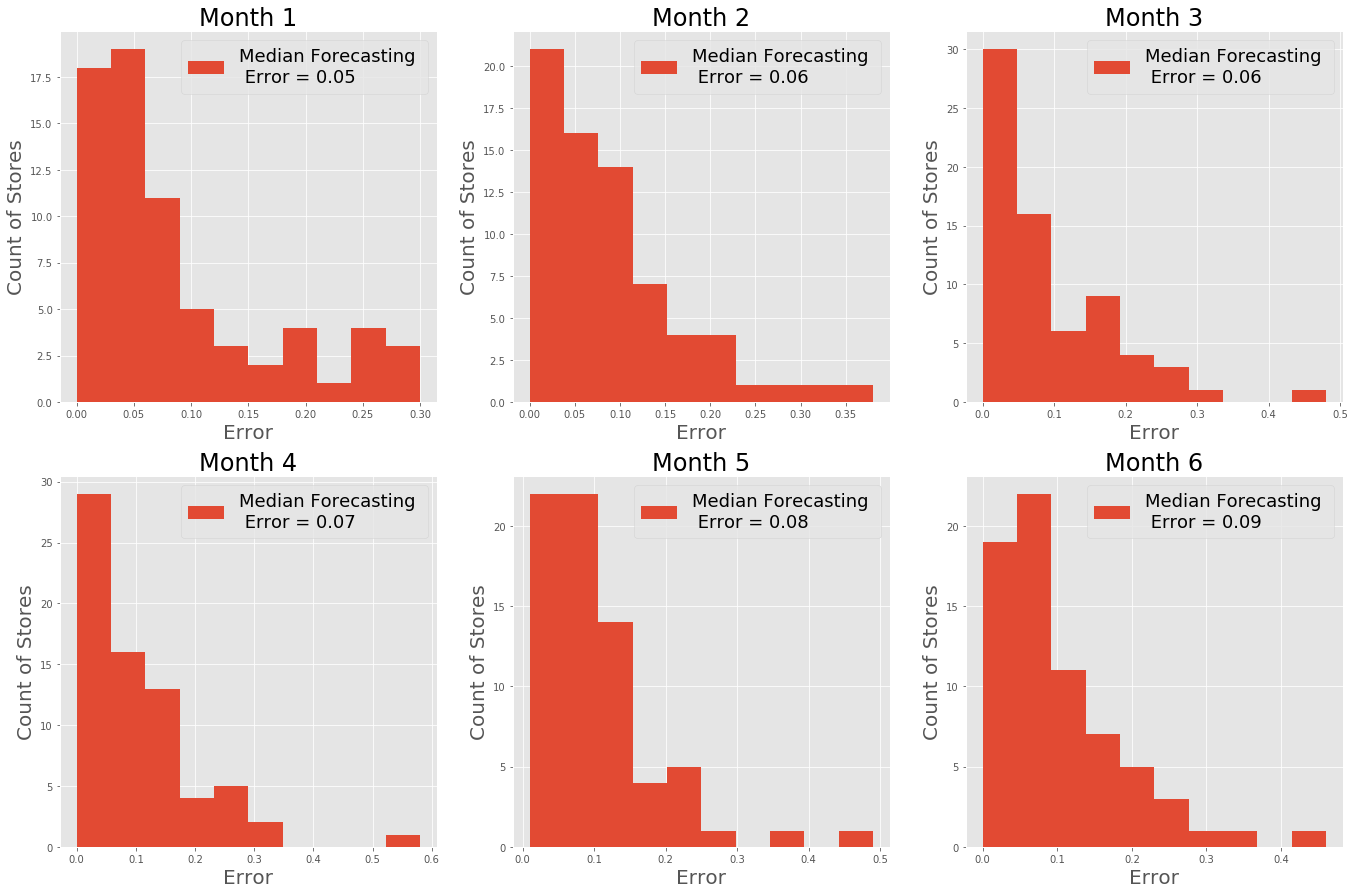

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (23,15))
axs[0, 0].hist(arima6_oct_error, label = f'Median Forecasting \n Error = {round(np.median(arima6_oct_error),2)}')
axs[0, 0].set_title('Month 1', fontsize = 24)
axs[0, 0].set_ylabel('Count of Stores', fontsize = 20)
axs[0, 0].set_xlabel('Error', fontsize = 20)
axs[0, 0].legend(fontsize = 18)

axs[0, 1].hist(arima6_nov_error, label = f'Median Forecasting \n Error = {round(np.median(arima6_nov_error),2)}')
axs[0, 1].set_title('Month 2', fontsize = 24)
axs[0, 1].set_ylabel('Count of Stores', fontsize = 20)
axs[0, 1].set_xlabel('Error', fontsize = 20)
axs[0, 1].legend(fontsize = 18)

axs[0, 2].hist(arima6_dec_error, label = f'Median Forecasting \n Error = {round(np.median(arima6_dec_error),2)}')
axs[0, 2].set_title('Month 3', fontsize = 24)
axs[0, 2].set_ylabel('Count of Stores', fontsize = 20)
axs[0, 2].set_xlabel('Error', fontsize = 20)
axs[0, 2].legend(fontsize = 18)

axs[1, 0].hist(arima6_jan_error, label = f'Median Forecasting \n Error = {round(np.median(arima6_jan_error),2)}')
axs[1, 0].set_title('Month 4', fontsize = 24)
axs[1, 0].set_ylabel('Count of Stores', fontsize = 20)
axs[1, 0].set_xlabel('Error', fontsize = 20)
axs[1, 0].legend(fontsize = 18)

axs[1, 1].hist(arima6_feb_error, label = f'Median Forecasting \n Error = {round(np.median(arima6_feb_error),2)}')
axs[1, 1].set_title('Month 5', fontsize = 24)
axs[1, 1].set_ylabel('Count of Stores', fontsize = 20)
axs[1, 1].set_xlabel('Error', fontsize = 20)
axs[1, 1].legend(fontsize = 18)

axs[1, 2].hist(arima6_mar_error, label = f'Median Forecasting \n Error = {round(np.median(arima6_mar_error),2)}')
axs[1, 2].set_title('Month 6', fontsize = 24)
axs[1, 2].set_ylabel('Count of Stores', fontsize = 20)
axs[1, 2].set_xlabel('Error', fontsize = 20)
axs[1, 2].legend(fontsize = 18)

plt.savefig('../images/arima_hist')
plt.show()

In [24]:
series2 = resample_series(make_series('CA_1', 'HOUSEHOLD_2'),'M')

train2, test2 = train_test_split(series2, train_size=len(series2)-6)
model2 = pm.auto_arima(train2, seasonal=True, m=12)
forecasts2 = model2.predict(test2.shape[0]).tolist()
#print(forecasts2)
#print(model2.summary())
actuals = []
periods_lst = [6,5,4,3,2,1]
for periods_back in periods_lst:
    if periods_back == 1:
        actuals.append(series2[-1:].iloc[0,0])
    else:
        actuals.append(series2[-periods_back:-1].iloc[0,0])
results = []
for idx, val in enumerate(forecasts2):
    results.append(calculate_errors(actuals[idx], val))
results

[0.05421530195093434,
 0.061842709637128845,
 0.03735894890018479,
 0.03781702003197606,
 0.0645547887813427,
 0.12299111777153611]

In [60]:
forecasts22 = forecasts2.copy()
#train2.iloc[-1][0]
train2.iloc[-1]

TOTAL    6176
Name: 2015-09-30 00:00:00, dtype: int64

In [65]:
series2[-7:]

,TOTAL
date,
2015-09-30,6176
2015-10-31,6624
2015-11-30,5564
2015-12-31,5936
2016-01-31,5682
2016-02-29,5803
2016-03-31,6395


In [52]:
#forecasts22 = np.array(forecasts22)
#forecasts22 = np.insert(forecasts22, 0,1)
forecasts22 = np.insert(np.array(forecasts22), 0 , train2.iloc[-1][0]).tolist()
forecasts22

[6176.0,
 6264.877839877011,
 5908.092836420985,
 6157.762720671497,
 5896.876307821688,
 6177.611439298132,
 7181.528198148973]

In [181]:
model2

ARIMA(order=(2, 0, 2), seasonal_order=(1, 1, 1, 12))

In [182]:
params = model2.get_params()
params

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (1, 1, 1, 12),
 'start_params': None,
 'suppress_warnings': False,
 'trend': None,
 'with_intercept': True}

In [183]:
params['order']
params['seasonal_order']

(1, 1, 1, 12)

In [121]:
SARIMAmodel = SARIMAX(train2, order=params['order'], seasonal_order=params['seasonal_order']).fit()

In [131]:
fcast = SARIMAmodel.get_forecast(6)
x = fcast.conf_int()
x['lower TOTAL'] = x['lower TOTAL'] - 1000
x = x.clip_lower(0)
x

,lower TOTAL,upper TOTAL
2015-10-31,7654.240872,11861.593915
2015-11-30,5499.070597,11078.682743
2015-12-31,2858.839599,10497.224257
2016-01-31,1263.050217,10880.416713
2016-02-29,0.000000,9772.425027
2016-03-31,0.000000,10093.709921


In [124]:
electric_model.forecast(6)

2015-10-31    7548.622453
2015-11-30    7370.654831
2015-12-31    7603.519756
2016-01-31    7428.844397
2016-02-29    7071.866065
2016-03-31    7401.863241
Freq: M, dtype: float64

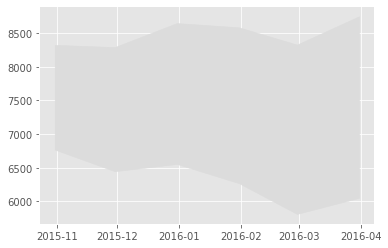

In [76]:
fig, ax = plt.subplots()


count = 0
for i in series_lst6:
    print(f'idx {count}: length {len(i)}')
    count += 1

In [20]:
lst_of_stores = series_setup(store_id, dept_id)

def updated_six_period_plot_forecast_vs_arima(idx):
    series = series_lst6[idx]
    if idx == 68 or idx == 69:
        train, test = train_test_split(series, train_size=len(series)-6)
        model = pm.auto_arima(train, seasonal=True)
        forecasts = model.predict(test.shape[0]).tolist()

    elif len(series) <= 24:
        train, test = train_test_split(series, train_size=len(series)-6)
        model = pm.auto_arima(train, seasonal=True)
        forecasts = model.predict(test.shape[0]).tolist()

    else:
        train, test = train_test_split(series, train_size=len(series)-6)
        model = pm.auto_arima(train, seasonal=True, m=12)
        forecasts = model.predict(test.shape[0]).tolist()
    
    forecasts1 = np.insert(np.array(forecasts), 0 , train.iloc[-1][0]).tolist()
    params = model.get_params()
    SARIMAmodel = SARIMAX(train, order=params['order'], seasonal_order=params['seasonal_order']).fit()
    fcast = SARIMAmodel.get_forecast(6)
    conf_inf = fcast.conf_int()
    #print(model.summary())
    print(model)
    fig, ax = plt.subplots(figsize = (18, 12))
    #ax.plot(train.index, train, label = 'Historical Sales Used for Forecast')
    ax.plot(series.index, series, label = 'Actual Sales')
    ax.plot(test.index, forecasts, label = 'Forecasted Sales')
    #ax.plot(series[-7:].index, forecasts1, label = 'Forecasted Sales')
    #ax.plot(series[-6:].index, series[-6:], label = 'Actual Sales',  c='C0', linestyle = '--')
    ax.fill_between(conf_inf.index, conf_inf['lower TOTAL'].clip_lower(0), conf_inf['upper TOTAL'], color = 'lightgrey', label = '95% Confidence Interval for Forecast')
    ax.axvline(x = series[-6:].index[0], color='k', linestyle='--', label = 'End of Historical Sales')
    ax.set_title(f'Comparison of Actual vs Forecasted Sales \n for the {lst_of_stores[idx][0]} Store and {lst_of_stores[idx][1]} Department', fontsize = 20)
    ax.set_xlabel('Time', fontsize = 28)
    ax.set_ylabel('Number of Products Sold', fontsize = 28)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(fontsize = 16)
    ax.set_ylim([None, 5350]) #for the good 45
    #ax.set_ylim([None, 21000]) #for the bad 54
    #ax.set_ylim([None, 5350]) #for the ugly 12
    plt.grid(c='silver')
    #plt.savefig('../images/the_good4')
    plt.show()

ARIMA(order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))


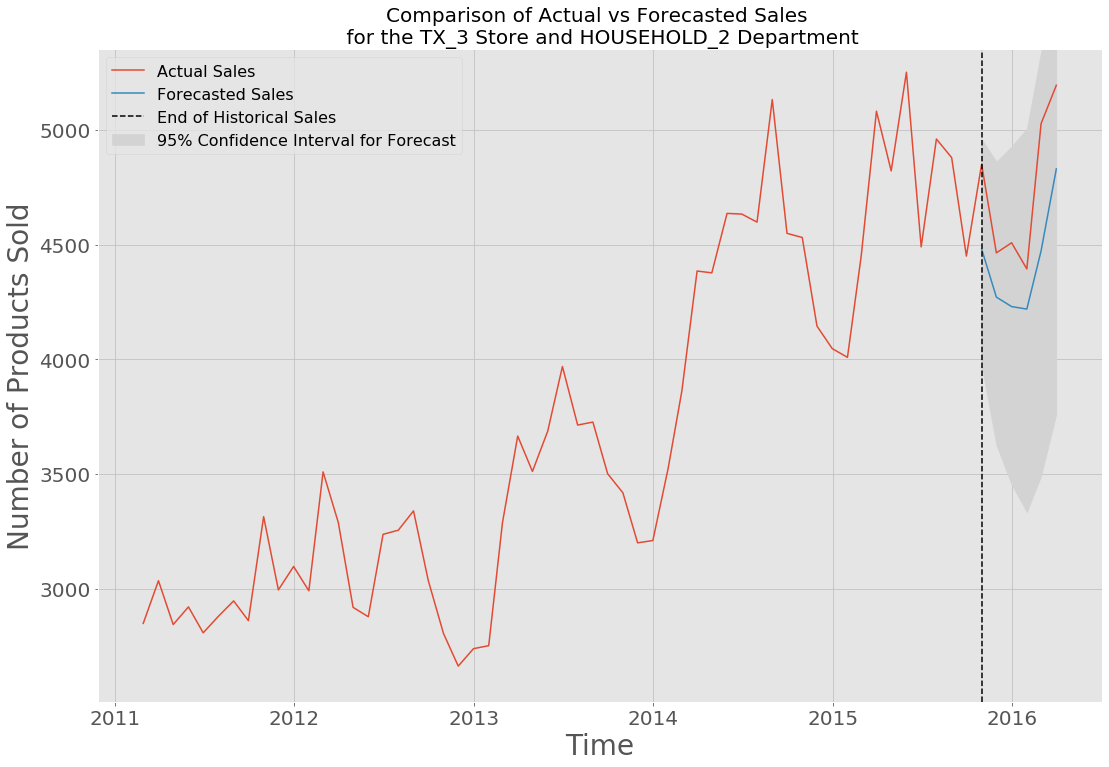

In [21]:
updated_six_period_plot_forecast_vs_arima(45)

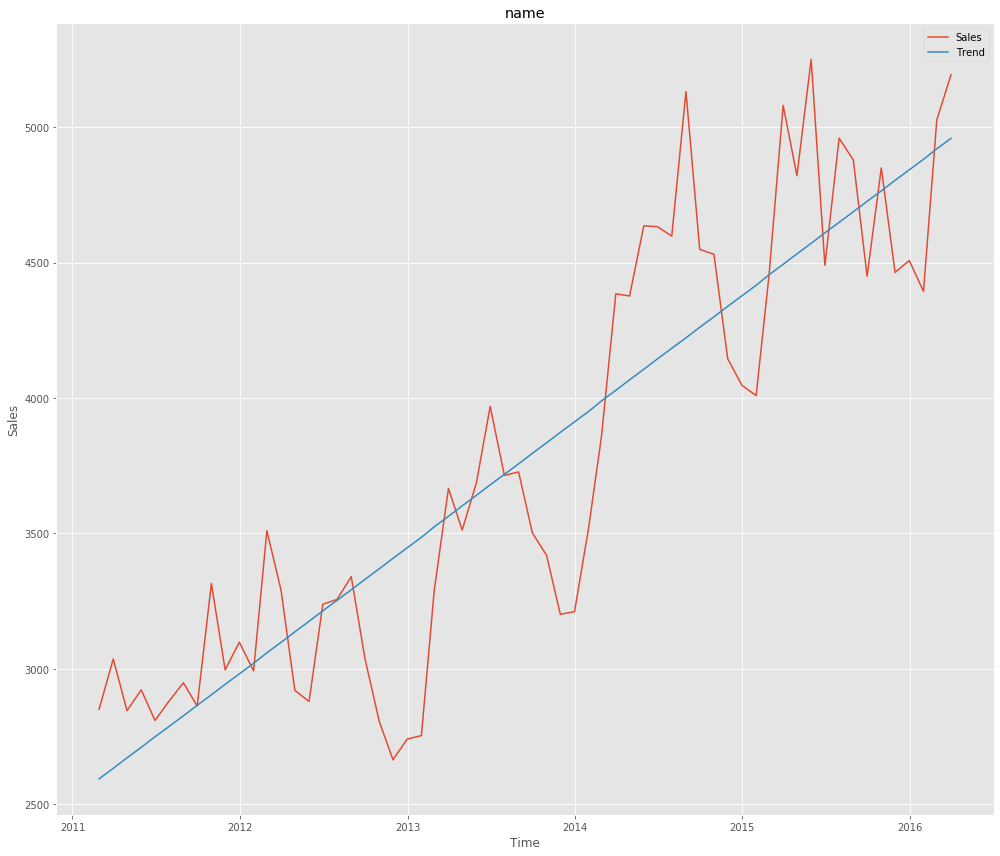

In [72]:
b = Graphs(make_series('TX_3', 'HOUSEHOLD_2'), 'M', 'name')
b.linear_trend()

In [106]:
test_series_lst = []
for series in series_setup(store_id, dept_id):
    test_series_lst.append(resample_series(make_series(series[0], series[1]), 'M'))

In [107]:
train1_lst = []
test1_lst = []
for i in test_series_lst:
    train, test = train_test_split(i, train_size=len(i)-6)
    train1_lst.append(train)
    test1_lst.append(test)

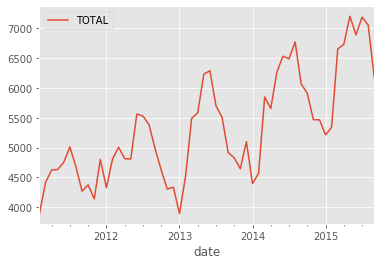

In [108]:
train1_lst[3].plot()

,TOTAL
date,
2011-12-31,10934
2012-01-31,11589
2012-02-29,13167
2012-03-31,13794
2012-04-30,13787


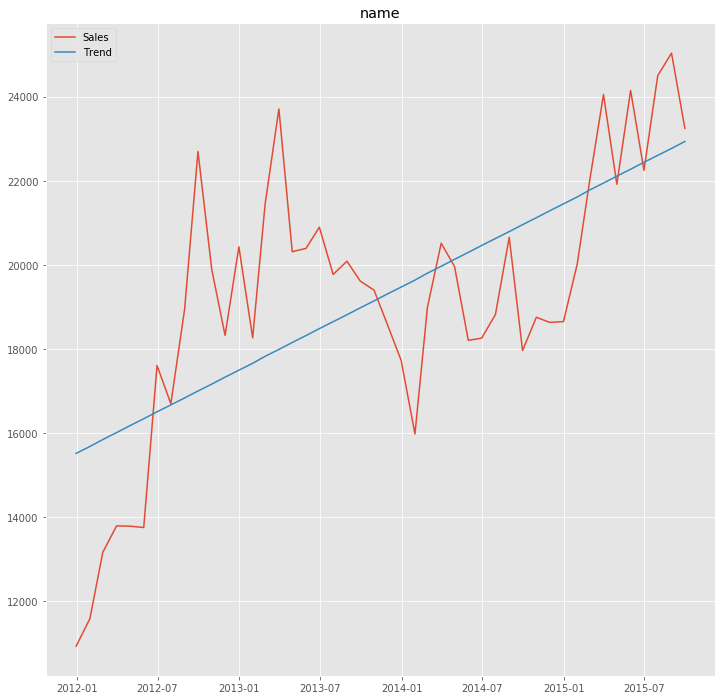

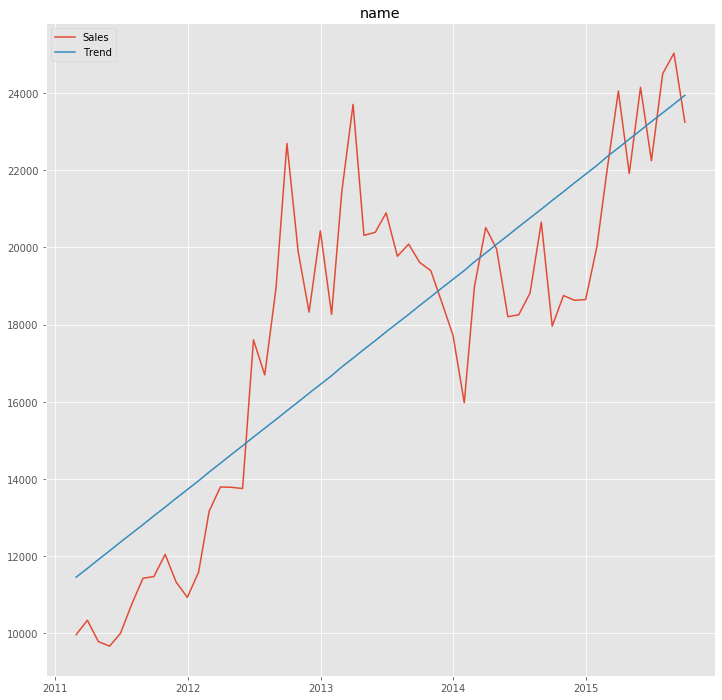

In [117]:
idx =3
row = 16
fig, ax = plt.subplots(figsize = (12,12))
plot_linear_trend(ax, 'name', train1_lst[idx][row-6:])

fig, ax = plt.subplots(figsize = (12,12))
plot_linear_trend(ax, 'name', train1_lst[idx])
train1_lst[idx][row-6:].head()

In [179]:
sm.tsa.stattools.adfuller(resample_series(make_series('CA_1', 'HOUSEHOLD_2'), 'M').diff()[1:])[1]

3.3780920072186022e-09

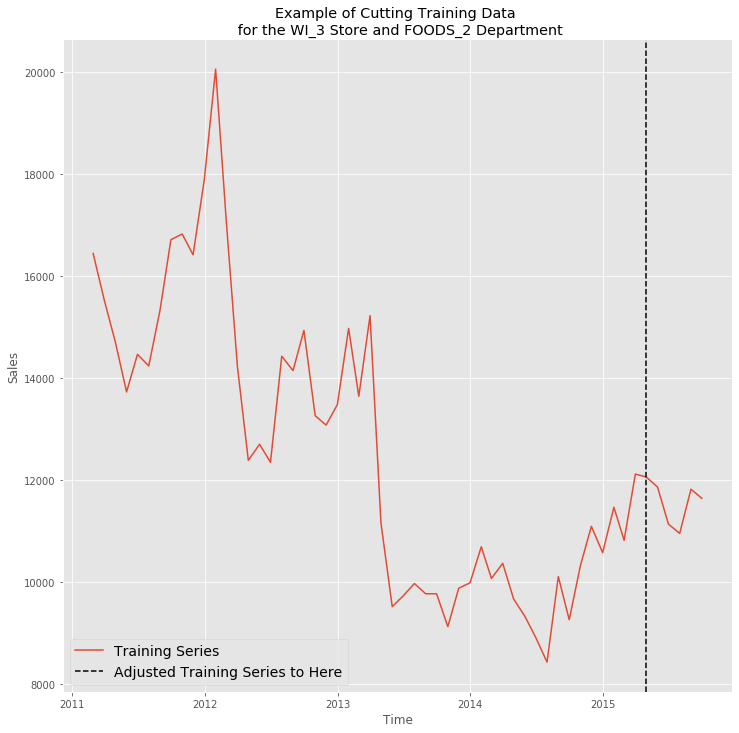

In [109]:
lst_of_stores = series_setup(store_id, dept_id)
idx = 68
row = 0

fig, ax = plt.subplots(figsize = (12,12))
ax.plot(train1_lst[idx], label = 'Training Series')
ax.axvline(x = train1_lst[idx][row-6:].index[0], color='k', linestyle='--', label = 'Adjusted Training Series to Here')
ax.set_title(f'Example of Cutting Training Data \n for the {lst_of_stores[idx][0]} Store and {lst_of_stores[idx][1]} Department')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend(fontsize = 14)
plt.show()

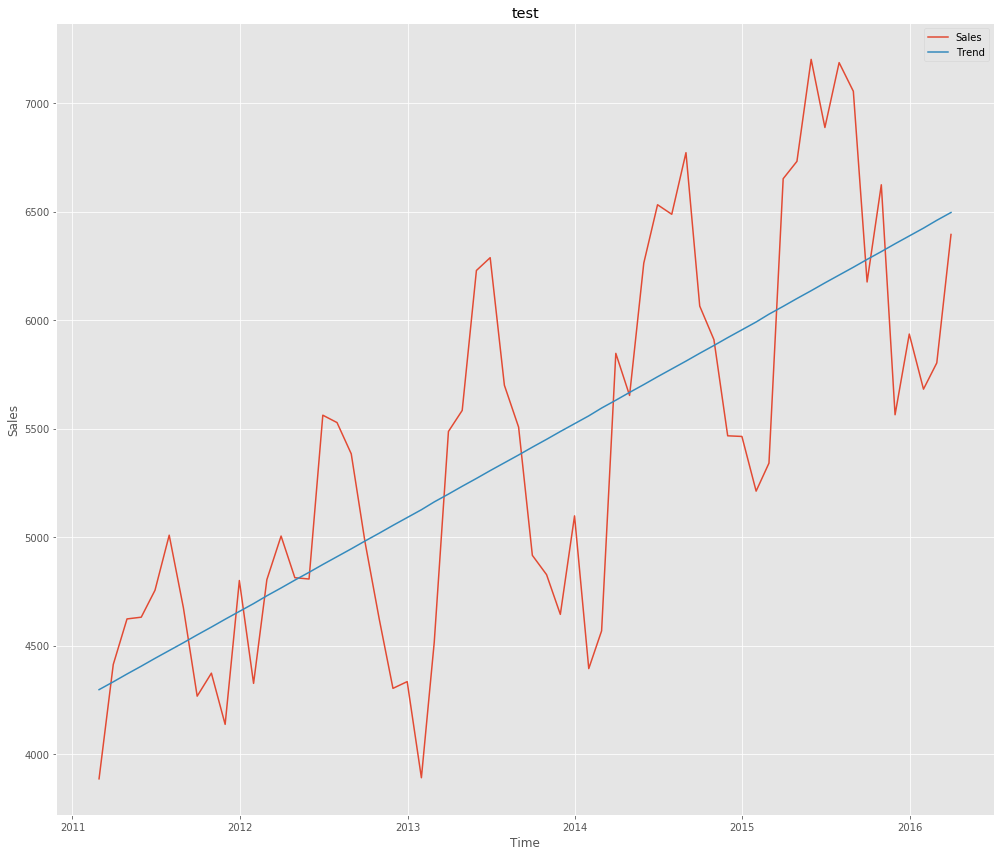

In [221]:
a = Graphs(make_series('CA_1', 'HOUSEHOLD_2'), 'M', 'test')
a.linear_trend()

In [114]:
y = resample_series(make_series('CA_2', 'FOODS_2'), 'M')
y

,TOTAL
date,
2011-02-28,3816
2011-03-31,4115
2011-04-30,4159
2011-05-31,3892
2011-06-30,4351
...,...
2015-11-30,13978
2015-12-31,13449
2016-01-31,15768


In [22]:
lst_of_stores = series_setup(store_id, dept_id)

def make_ugly(idx):
    'meant for idx = 12'
    series = series_lst6[idx]
    y = resample_series(make_series('CA_2', 'FOODS_2'), 'M')

    train, test = train_test_split(series, train_size=len(series)-6)
    model = pm.auto_arima(train, seasonal=True)
    forecasts = model.predict(test.shape[0]).tolist()

    forecasts1 = np.insert(np.array(forecasts), 0 , train.iloc[-1][0]).tolist()
    params = model.get_params()
    SARIMAmodel = SARIMAX(train, order=params['order'], seasonal_order=params['seasonal_order']).fit()
    fcast = SARIMAmodel.get_forecast(6)
    conf_inf = fcast.conf_int()
    print(model)
    fig, ax = plt.subplots(figsize = (18, 12))
    ax.plot(y.index, y, label = 'Actual Sales')
    #ax.plot(series[-7:].index, forecasts1, label = 'Forecasted Sales')
    ax.plot(test.index, forecasts, label = 'Forecasted Sales')
    ax.fill_between(conf_inf.index, conf_inf['lower TOTAL'].clip_lower(0), conf_inf['upper TOTAL'], color = 'lightgrey', label = '95% Confidence Interval for Forecast')
    ax.axvline(x = series[-6:].index[0], color='k', linestyle='--', label = 'End of Historical Sales')
    ax.set_title(f'Comparison of Actual vs Forecasted Sales \n for the {lst_of_stores[idx][0]} Store and {lst_of_stores[idx][1]} Department', fontsize = 20)
    ax.set_xlabel('Time', fontsize = 28)
    ax.set_ylabel('Number of Products Sold', fontsize = 28)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(fontsize = 16)
    plt.grid(c='silver')
    plt.savefig('../images/the_ugly4')
    plt.show()

ARIMA(order=(2, 0, 0))


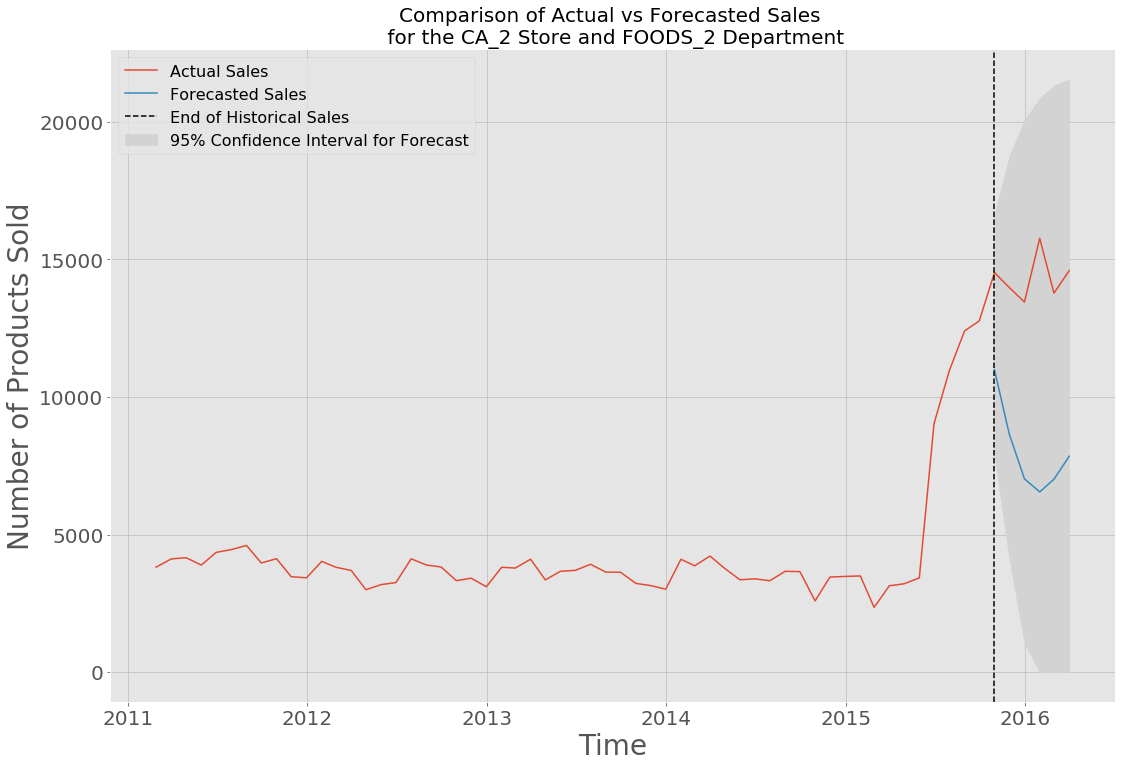

In [23]:
make_ugly(12)

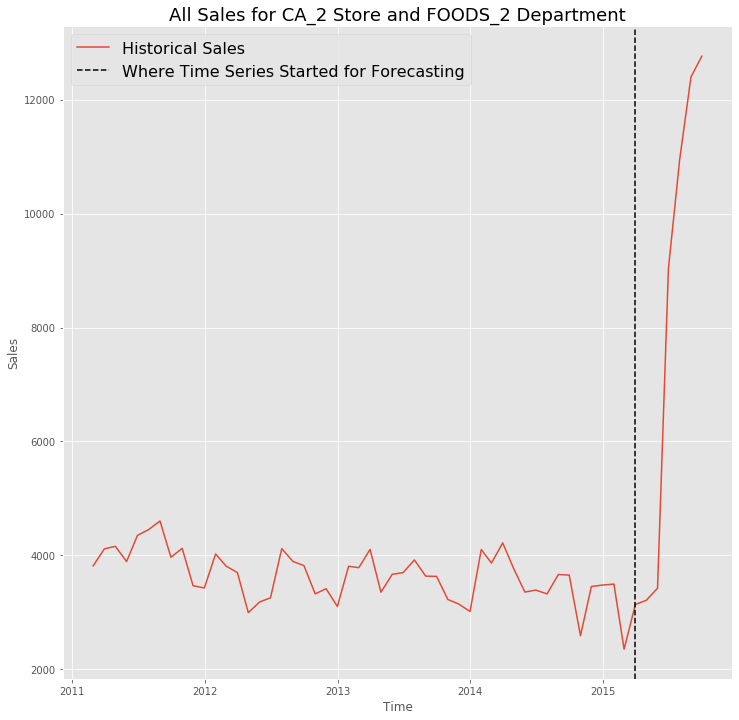

In [154]:
x = resample_series(make_series('CA_2', 'FOODS_2'), 'M')
fig, ax = plt.subplots(figsize = (12,12))
ax.plot(x[:-6], label = 'Historical Sales')
ax.set_title('All Sales for CA_2 Store and FOODS_2 Department', fontsize = 18)
ax.axvline(x = x[-13:].index[0], color='k', linestyle='--', label = 'Where Time Series Started for Forecasting')
ax.legend(fontsize = 16)
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.savefig('../images/the_ugly_actuals')
plt.show()

In [184]:
sm.tsa.stattools.adfuller(resample_series(make_series('CA_1', 'HOUSEHOLD_2'), 'M').diff()[1:])[1]

3.3780920072186022e-09

In [185]:
test = resample_series(make_series('CA_1', 'HOUSEHOLD_2'), 'M').diff()[1:]
test

,TOTAL
date,
2011-03-31,527.0
2011-04-30,210.0
2011-05-31,8.0
2011-06-30,124.0
2011-07-31,254.0
...,...
2015-11-30,-1060.0
2015-12-31,372.0
2016-01-31,-254.0


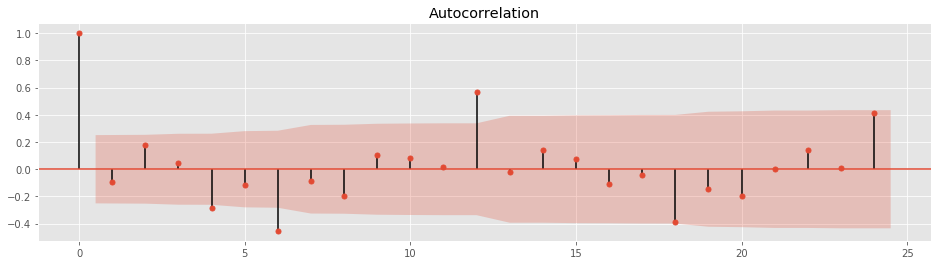

In [187]:
fig, ax = plt.subplots(1, figsize=(16, 4))

_ = sm.graphics.tsa.plot_acf(test, lags=2*12, ax=ax)

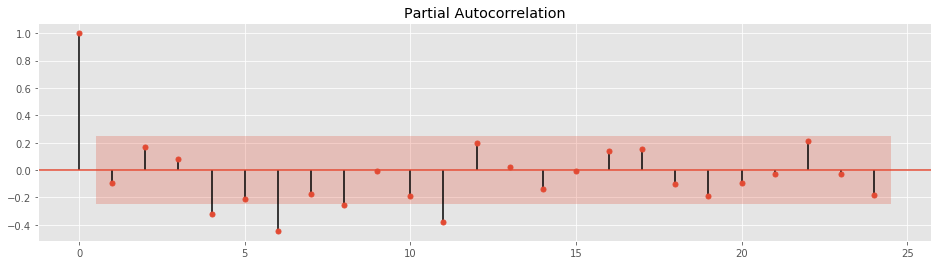

In [188]:
fig, ax = plt.subplots(1, figsize=(16, 4))

_ = sm.graphics.tsa.plot_pacf(test, lags=2*12, ax=ax, method='ywmle')

In [229]:
test_model1 = SARIMAX(test, order=(2, 0, 2), seasonal_order=(1,1,1,12)).fit()

In [230]:
test_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                TOTAL   No. Observations:                   61
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -352.620
Date:                              Thu, 04 Jun 2020   AIC                            719.239
Time:                                      15:01:55   BIC                            732.482
Sample:                                  03-31-2011   HQIC                           724.264
                                       - 03-31-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2711      0.171     -1.586      0.113      -0.606       0.064
ar.L2          0.6042      0.181      3.342      0.001       0.250       0.959
ma.L1       3.585e-05    214.135   1.67e-07      1.000    -419.698     419.698
ma.L2         -1.0000      3.335     -0.300      0.764      -7.536       5.536
ar.S.L12      -0.9987      0.244     -4.093      0.000      -1.477      -0.520
ma.S.L12       0.9591      3.678      0.261      0.794      -6.249       8.167
sigma2      7.503e+04      0.002   3.28e+07      0.000     7.5e+04     7.5e+04
===================================================================================
Ljung-Box (Q):                       35.95   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.65   Prob(JB):                         0.69
Heteroskedasticity (H):               0.88   Skew:                             0.24
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+26. Standard errors may be unstable.
"""

In [232]:
test_model11 = SARIMAX(test, order=(0, 1, 0), seasonal_order=(0,0,0,0)).fit()
test_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  TOTAL   No. Observations:                   61
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -478.566
Date:                Thu, 04 Jun 2020   AIC                            959.132
Time:                        15:02:45   BIC                            961.226
Sample:                    03-31-2011   HQIC                           959.951
                         - 03-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.959e+05    1.1e+05      4.508      0.000     2.8e+05    7.11e+05
===================================================================================
Ljung-Box (Q):                      128.68   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.00   Prob(JB):                         0.57
Heteroskedasticity (H):               2.47   Skew:                            -0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

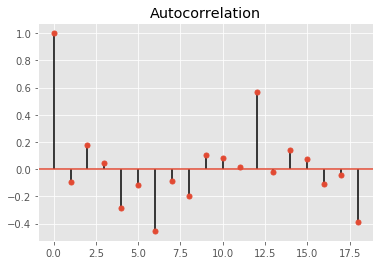

In [215]:
pm.plot_acf(test)

In [218]:
pm.arima.ndiffs(resample_series(make_series('CA_1', 'HOUSEHOLD_2'), 'M'))

1

In [235]:
z = pm.auto_arima(resample_series(make_series('CA_1', 'HOUSEHOLD_2'), 'M'), seasonality = True, m = 12)

In [236]:
z

ARIMA(order=(2, 0, 2), seasonal_order=(1, 1, 1, 12))

In [237]:
z.resid()

array([3322.96023892, 3653.26291749, 3725.25790318, 3739.27024211,
       3961.97708867, 4288.00289677, 3926.04570055, 3461.48555645,
       3551.67846499, 3333.88838388, 4054.25401935, 3594.52658861,
        283.7948314 ,   98.16004476, -106.28820807,   21.60001162,
        611.92965187,  -33.22905894,   14.22408928,  212.47932497,
        -58.97032817,  -62.235639  , -666.66252403, -514.19279033,
       -145.1356166 ,  498.55736194,  182.60925602,  392.09775128,
       -149.35148238, -387.29101179,  158.06157644,   45.20852108,
       -204.22279874, -339.83589778,   84.30367179,  -17.84173658,
       -487.34586162,   69.07264752, -195.34556811, -115.76994035,
        -31.78424028,  255.15055833,  625.63885711,  157.06055324,
        -21.3512918 ,   48.99242132,  -52.39053752,  390.10568717,
        -63.77803456,  -19.22121781,  262.28850792,  403.70382826,
       -266.34985947,   98.42238397,   16.10187288, -216.01622129,
        387.43787047, -419.42170506, -237.44869371,   75.95373

In [239]:
z.aicc()

728.0822342243532